In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import re
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
data = pd.read_csv('nyc_real_estate.csv', index_col=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       387 non-null    int64 
 1   Name             387 non-null    object
 2   City             387 non-null    object
 3   Neighbourhood    387 non-null    object
 4   Price            387 non-null    object
 5   Year Built       387 non-null    object
 6   Beds             387 non-null    object
 7   Baths            387 non-null    object
 8   Area             387 non-null    object
 9   Price(per sqft)  387 non-null    object
 10  A/C              387 non-null    object
dtypes: int64(1), object(10)
memory usage: 33.4+ KB


In [4]:
data.rename(columns = {"Area" : "Area (sqft)"}, inplace = True)
data = data.drop(labels = ['Unnamed: 0'], axis = 1)
data = data.replace("Null", pd.NA).dropna()
data['Price'] = data['Price'].str.replace('$', '')
data['Baths_cleaned'] = data['Baths'].str.replace('Baths', '')
data['Baths_cleaned'] = data['Baths_cleaned'].str.replace('Bath', '')
data['Year Built'] = data['Year Built'].apply(lambda x : x[-4:])
data['Area (sqft)']= data['Area (sqft)'].apply(lambda x: x.strip('sqft'))
data['Area (sqft)']= data['Area (sqft)'].str.replace(',', '')
data['Beds'] = data['Beds'].apply(lambda x : x[0])
data['Beds'] = data['Beds'].replace('S', 0.5)
data['Price'] = data['Price'].str.replace(',', '').astype(int)
data['Beds'] = data['Beds'].apply(lambda x: int(x))
data['Year Built'] = data['Year Built'].apply(lambda x : int(x[-4:]))
data['Beds'] = data['Beds'].replace('S', 0.5)
#data['Price'] = data['Price'].apply(lambda x: int(re.search(r'\d+', x).group()))
data['Beds'] = data['Beds'].apply(lambda x : int(x))
data['Price(per sqft)'] = data['Price(per sqft)'].str.replace('$', '')
data['Price(per sqft)'] = data['Price(per sqft)'].str.replace(',', '').astype(int)
data['Area (sqft)'] = data['Area (sqft)'].apply(lambda x : x.strip('sqft'))
data['Area (sqft)'] = data['Area (sqft)'].str.replace(',', '')
data['Area (sqft)'] = data['Area (sqft)'].apply(lambda x : int(re.search(r'\d+', x).group()))

/var/folders/bm/7gfzqmk92w7f0g15qhnh3_1h0000gn/T/ipykernel_35891/3189022513.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price'] = data['Price'].str.replace('$', '')
/var/folders/bm/7gfzqmk92w7f0g15qhnh3_1h0000gn/T/ipykernel_35891/3189022513.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price(per sqft)'] = data['Price(per sqft)'].str.replace('$', '')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 1 to 385
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             251 non-null    object
 1   City             251 non-null    object
 2   Neighbourhood    251 non-null    object
 3   Price            251 non-null    int64 
 4   Year Built       251 non-null    int64 
 5   Beds             251 non-null    int64 
 6   Baths            251 non-null    object
 7   Area (sqft)      251 non-null    int64 
 8   Price(per sqft)  251 non-null    int64 
 9   A/C              251 non-null    object
 10  Baths_cleaned    251 non-null    object
dtypes: int64(5), object(6)
memory usage: 23.5+ KB


## What is the distribution of property types & pricing in New York?

Outlier detection paired with descriptive statistics (mean, mode, SD, etc.)

Histogram - traditional distribution plot to serve as a basis for understanding the broad scope of the NY Real Estate market

### SVM classification

In [6]:
target = "Baths"

X = data.drop(columns=[target,'Name','City','Neighbourhood','Price(per sqft)','A/C'])
y = data[target]

#X is just the measurements and y are just the labels

seed = 100
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [7]:
model = svm.SVC(gamma="scale",kernel="rbf")
#instantiation of the moderl and pass in hyper-parameters
model.fit(X_train, y_train)

SVC()

### SVC()

In [8]:
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#score model to get accuracy

Accuracy: 57.83%


In [9]:
y_pred

array(['6 Baths', '1 Bath', '2 Baths', '1 Bath', '1 Bath', '2 Baths',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '2 Baths', '2 Baths',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '1 Bath', '6 Baths', '1 Bath', '1 Bath', '6 Baths', '2 Baths',
       '2 Baths', '1 Bath', '1 Bath', '4 Baths', '1 Bath', '1 Bath',
       '1 Bath', '6 Baths', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '4 Baths', '2 Baths',
       '4 Baths', '1 Bath', '1 Bath', '1 Bath', '2 Baths', '1 Bath',
       '2 Baths', '1 Bath', '2 Baths', '1 Bath', '1 Bath', '2 Baths',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '6 Baths', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '2 Baths', '2 Baths', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '1 Bath', '2 Baths', '1 Bath', '1 Bath', '2 Baths'], dtype=object)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.5783132530120482
[[31  0  0  0  0  0]
 [26  9  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 3  0  0  3  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  0  5]]
              precision    recall  f1-score   support

      1 Bath       0.52      1.00      0.68        31
     2 Baths       0.60      0.26      0.36        35
     3 Baths       0.00      0.00      0.00         4
     4 Baths       1.00      0.50      0.67         6
     5 Baths       0.00      0.00      0.00         2
     6 Baths       1.00      1.00      1.00         5

    accuracy                           0.58        83
   macro avg       0.52      0.46      0.45        83
weighted avg       0.58      0.58      0.51        83



/Users/caseysestanovich/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/caseysestanovich/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/caseysestanovich/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

### Naive Bayes Classification

In [11]:
model = GaussianNB()
#instantiate the model
model.fit(X_train, y_train)
#fit to the training data set (never fit to test dataset)
y_pred = model.predict(X_test)
# make predictions for test data
predictions = y_pred
#gives us a series of predictions and set to a new variable 
predictions

array(['6 Baths', '1 Bath', '2 Baths', '1 Bath', '1 Bath', '2 Baths',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '2 Baths', '5 Baths',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '1 Bath', '6 Baths', '1 Bath', '1 Bath', '6 Baths', '2 Baths',
       '2 Baths', '1 Bath', '1 Bath', '4 Baths', '1 Bath', '1 Bath',
       '1 Bath', '6 Baths', '1 Bath', '1 Bath', '4 Baths', '4 Baths',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '4 Baths', '3 Baths',
       '4 Baths', '1 Bath', '1 Bath', '1 Bath', '2 Baths', '1 Bath',
       '2 Baths', '1 Bath', '3 Baths', '1 Bath', '1 Bath', '3 Baths',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '1 Bath', '1 Bath', '4 Baths', '1 Bath', '1 Bath', '1 Bath',
       '6 Baths', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '2 Baths', '2 Baths', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '1 Bath', '3 Baths', '1 Bath', '1 Bath', '5 Baths'], dtype='<U7')

In [12]:
matches = pd.concat([pd.DataFrame(y_test.values).reset_index(),pd.DataFrame(predictions).reset_index()], axis=1)
#concatinate the test values put them next to our actual values. Row 17 is the first falsley predicted label
#Actual is veriscilor predicted is virginica (modle doenst get everything correct)

matches

,index,0,index,0
0,0,6 Baths,0,6 Baths
1,1,2 Baths,1,1 Bath
2,2,2 Baths,2,2 Baths
3,3,1 Bath,3,1 Bath
4,4,1 Bath,4,1 Bath
...,...,...,...,...
78,78,1 Bath,78,1 Bath
79,79,3 Baths,79,3 Baths
80,80,2 Baths,80,1 Bath
81,81,2 Baths,81,1 Bath


In [13]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
#actual number of posistives + true negatives / allsamples
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#confusion_matrix tells us where the model went wrong
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 68.67%
[[31  0  0  0  0  0]
 [26  9  0  0  0  0]
 [ 0  0  4  0  0  0]
 [ 0  0  0  6  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  5]]
              precision    recall  f1-score   support

      1 Bath       0.54      1.00      0.70        31
     2 Baths       1.00      0.26      0.41        35
     3 Baths       1.00      1.00      1.00         4
     4 Baths       1.00      1.00      1.00         6
     5 Baths       1.00      1.00      1.00         2
     6 Baths       1.00      1.00      1.00         5

    accuracy                           0.69        83
   macro avg       0.92      0.88      0.85        83
weighted avg       0.83      0.69      0.64        83



/Users/caseysestanovich/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


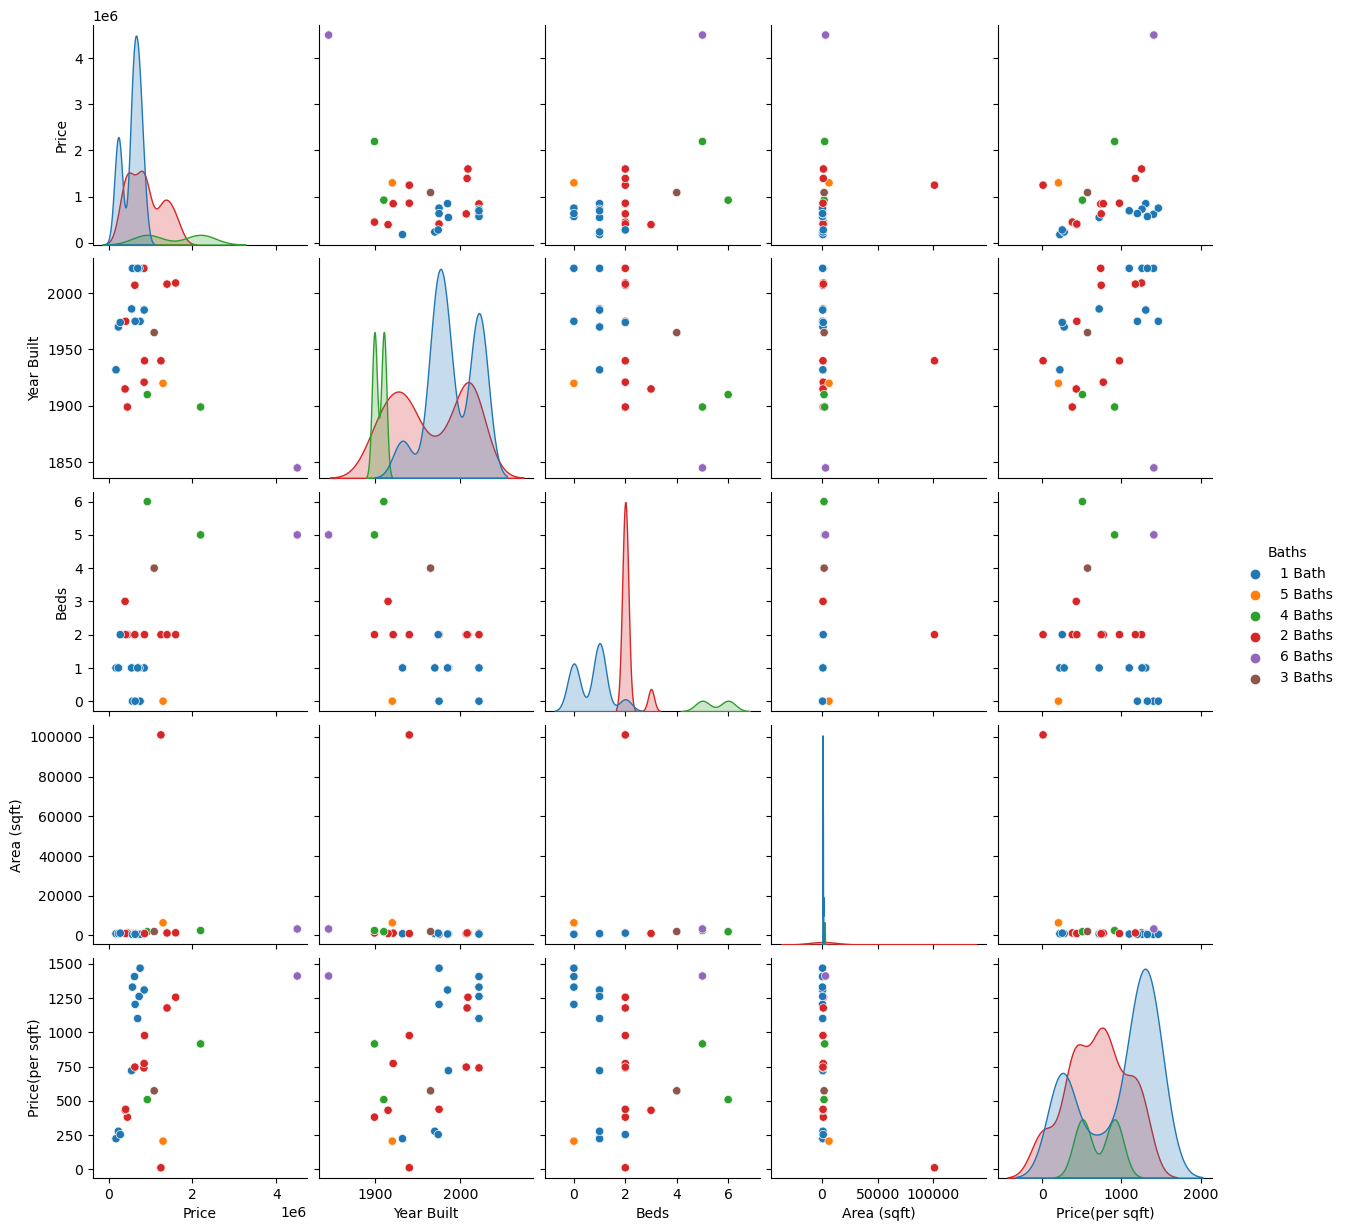

In [14]:
sns.pairplot(data,hue='Baths', size=2.5)

### Decision Tree Classifier

In [15]:
model = DecisionTreeClassifier(
    random_state=3, 
    criterion='entropy',
    splitter='best', 
    max_depth=3, 
    )

#decison trees are the same game as 20 questions on a dataset
#entropy is a measure of the predictablity in each class 
#max_depth 


model.fit(X_train,y_train)
#fit
y_pred = model.predict(X_test)
#predict
accuracy = model.score(X_test, y_test)
# evaluate predictions

print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.16%


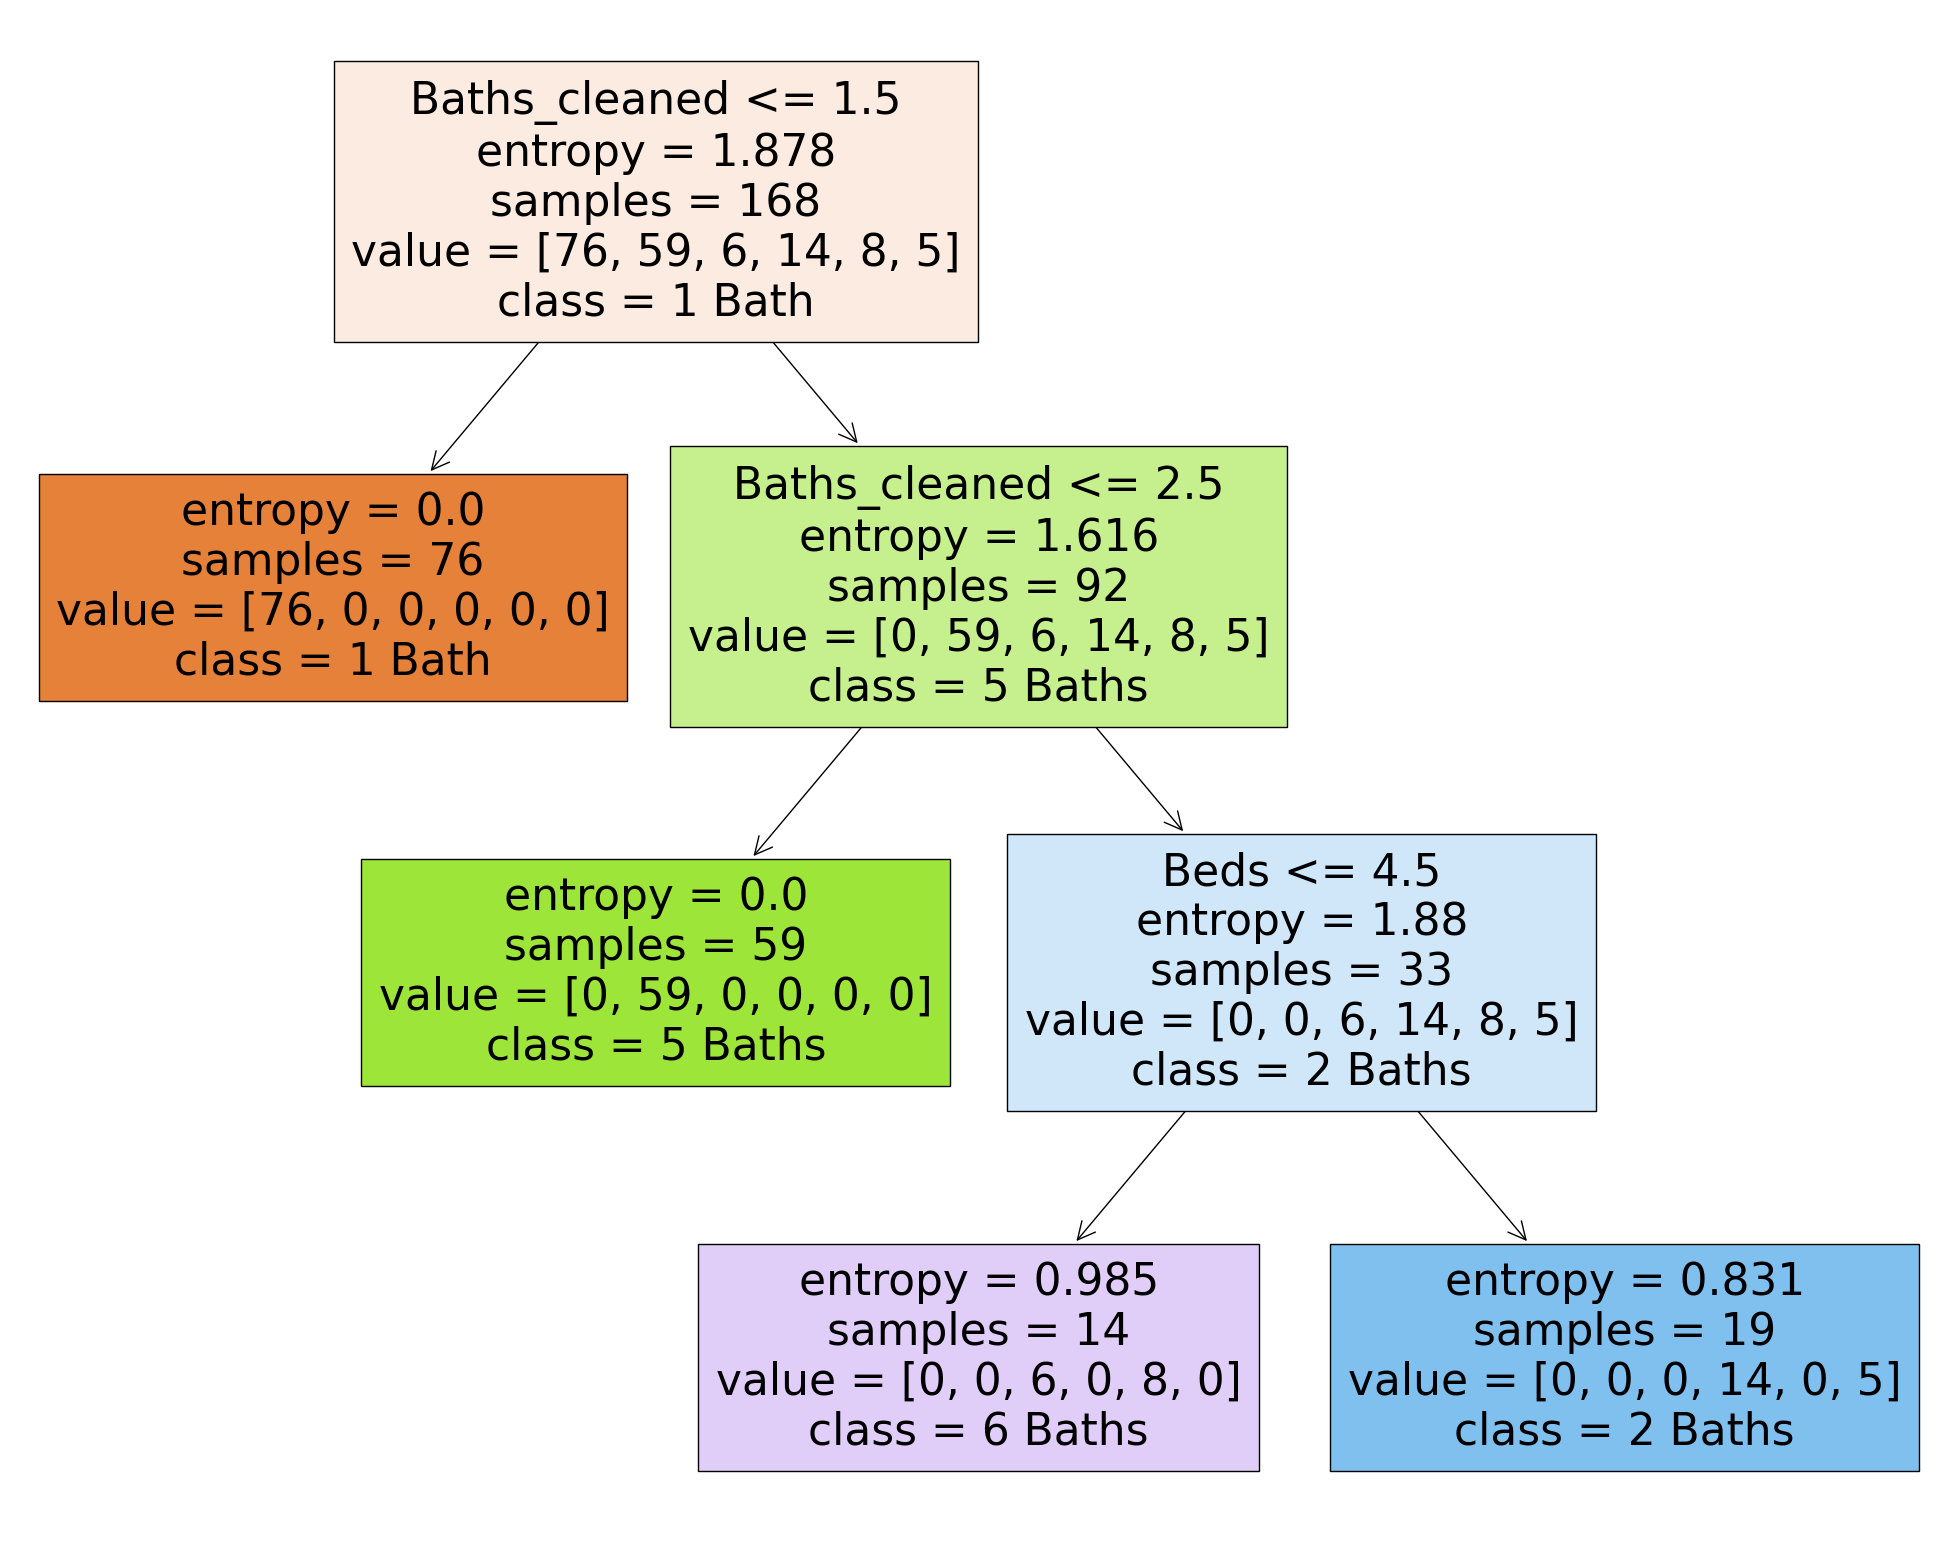

In [16]:
fig = plt.figure(figsize=(25,20))
# we use '_' to capture the return from plot_tree(...) and never do anything with it
_ = plot_tree(model, 
                feature_names=list(X.columns),  # ordered list of features
                class_names=list(y.unique()), # unique() is handy here due to numerical sorting of classes
                filled=True)

## Is there a correlation between the number of bedrooms and property price?

In [17]:
olsreg = ols('Price ~ Beds', data=data).fit()
olsreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     99.46
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           6.30e-20
Time:                        16:26:11   Log-Likelihood:                -3740.0
No. Observations:                 251   AIC:                             7484.
Df Residuals:                     249   BIC:                             7491.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    4.29e+05   7.02e+04      6.113      0.000    2.91e+05    5.67e+05
Beds        2.828e+05   2.84e+04      9.973      0.000    2.27e+05    3.39e+05
==============================================================================
Omnibus:                      106.656   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              410.887
Skew:                           1.775   Prob(JB):                     5.98e-90
Kurtosis:                       8.166   Cond. No.                         4.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
r_squared = olsreg.rsquared
p_value = olsreg.f_pvalue

r_squared, p_value

(0.2854370344509515, 6.301769648197888e-20)

The R-squared value from the OLS regression is a statistical measure representing the proportion of the variance for property price (dependent variable) explained by the number of bedrooms (independent variable). With a value of 0.2854, we see that approximately 28.54% of the variability in property prices can be explained by the number of bedrooms.

Additionally, the p-value is a statistical test to determine whether there is a relationship between two variables. In this case, we are looking at if there is a relationship between the number of bedrooms and property price. Due to the number of 6.301769648197888e-20, we see there is a statistically significant relationship because of how small the p-value is. This means we have strong enough evidence to reject the null hypothesis that there is no relationship between these two variables.


In summary, the analysis using linear regression suggests that the number of bedrooms has a statistically significant correlation with property price, and the model explains approximately 28.54% of the variability in property prices based on the number of bedrooms.

Text(463.154761904762, 0.5, 'Price ($)')

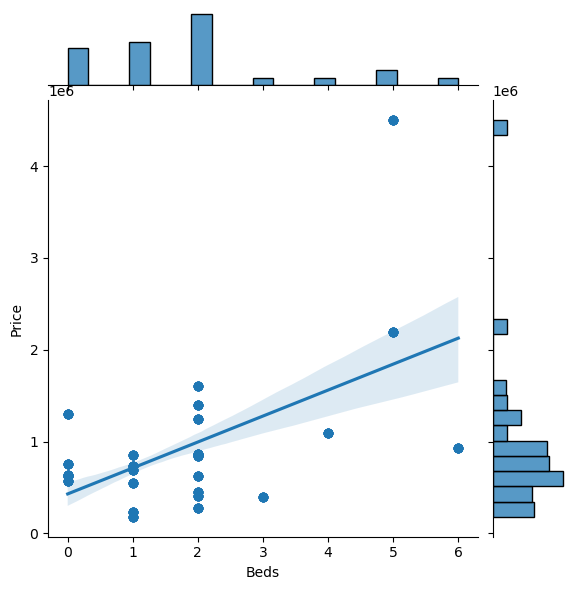

In [19]:
jg = sns.JointGrid(x="Beds", y="Price", data=data)
jg.plot(sns.regplot, sns.histplot)
plt.xlabel("Number of Beds")
plt.ylabel("Price ($)")

## INTERP

In [20]:
infl = olsreg.get_influence()
sm_fr = infl.summary_frame()
sm_fr
#SHOWs how many influence points are there for the above Q, according to statistically significant Cook's distances?

,dfb_Intercept,dfb_Beds,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
1,0.026136,-0.019939,0.000343,0.266923,0.009531,0.026184,0.266424,0.026136
2,0.001716,-0.000890,0.000002,0.025390,0.005212,0.001838,0.025339,0.001834
3,0.019291,-0.014717,0.000187,0.197035,0.009531,0.019329,0.196654,0.019291
4,-0.001583,0.000821,0.000001,-0.023425,0.005212,-0.001696,-0.023378,-0.001692
6,-0.044887,0.023288,0.001154,-0.663607,0.005212,-0.048033,-0.662860,-0.047979
...,...,...,...,...,...,...,...,...
379,0.028189,-0.021505,0.000399,0.287889,0.009531,0.028241,0.287358,0.028189
381,-0.204404,0.474961,0.135198,3.732022,0.019044,0.519996,3.833272,0.534104
382,0.020917,0.002457,0.000626,0.558166,0.004003,0.035388,0.557393,0.035338
384,-0.037382,-0.004391,0.001994,-0.996139,0.004003,-0.063155,-0.996123,-0.063154


### IDK HOW NECESSARY THIS IS
dfb_Intercept and dfb_Beds: These columns represent the change in the fitted values (predicted property prices) for the intercept and the number of bedrooms when the corresponding data point is excluded. For example, positive values indicate an increase in the predicted property price, and negative values indicate a decrease.

cooks_d: Cook's distance is a measure of the influence of each data point on the regression coefficients. Larger values of Cook's distance indicate greater influence. In this context, the threshold for considering a point influential often depends on the specific problem or the scale of the data.

standard_resid and student_resid: These columns represent the standardized residuals and studentized residuals, respectively. Residuals measure the vertical distance between observed and predicted values. Large residuals may indicate influential points.

hat_diag: The hat diagonal elements represent the leverage of each data point. High leverage points can have a strong impact on the regression coefficients.

dffits_internal and dffits: These columns provide measures of the change in the fitted values when the corresponding data point is excluded. Larger values indicate greater influence.

## How does property price (price/sqft) vary across different neighborhoods in New York?

In [21]:
def labelled_scatterplot(data=None,x=None,y=None,labs=None):
    p1 = sns.scatterplot(data=data,x=x,y=y)
    for line in range(0,data.shape[0]):
        p1.text(data[x][line]+0.01, data[y][line], 
                data[labs][line], horizontalalignment='left', 
                size='medium', color='black')
        

In [22]:
output = data[3:7].corr()#.unstack().sort_values(ascending=False).reset_index()
output = output.unstack().sort_values(key=abs, ascending=False).drop_duplicates().reset_index()
output.columns = ['var1', 'var2', 'correlation']
mask = output.apply(lambda x: x.var1 != x.var2, axis=1)
output = output[mask]
output[:5]

/var/folders/bm/7gfzqmk92w7f0g15qhnh3_1h0000gn/T/ipykernel_35891/2505699685.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  output = data[3:7].corr()#.unstack().sort_values(ascending=False).reset_index()


,var1,var2,correlation
1,Price,Area (sqft),0.829771
2,Year Built,Price(per sqft),0.744994
3,Year Built,Area (sqft),-0.614899
4,Price(per sqft),Area (sqft),-0.579244
5,Price,Year Built,-0.561095


In [23]:
data_pca = data[['Price', 'Year Built', 'Beds', 'Baths_cleaned', 'Area (sqft)', 'Price(per sqft)']]
houses_X = data_pca.values
houses_Y = data_pca.index
from sklearn.preprocessing import scale
scale(houses_X)

array([[-0.40496747,  1.22476924, -1.17998832, -0.78875229, -0.24760062,
         1.33442156],
       [-0.27509971,  1.22476924, -0.55514218, -0.78875229, -0.24053395,
         1.00685759],
       [-0.46399827,  1.22476924, -1.17998832, -0.78875229, -0.24821511,
         1.16047379],
       ...,
       [ 0.51000991,  0.92929766,  0.06970395, -0.03884008, -0.20950206,
         0.81709639],
       [-0.80649497,  0.21172381,  0.06970395, -0.78875229, -0.21385472,
        -1.26801774],
       [ 0.14874142,  0.02177779,  1.31939622,  0.71107214, -0.17293974,
        -0.547377  ]])

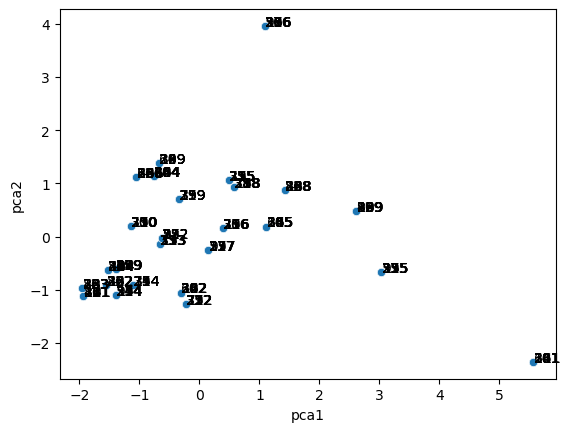

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scale(houses_X))
X_pca_labelled = pd.concat([pd.DataFrame({'who':houses_Y}),pd.DataFrame(X_pca,columns=['pca1','pca2'])],axis=1)
labelled_scatterplot(data=X_pca_labelled,x='pca1',y='pca2',labs='who')

In [25]:
pca.explained_variance_

array([2.94888652, 1.50753934])

In [26]:
np.cov(X_pca)

array([[ 0.34133892,  0.26140978,  0.40705554, ..., -0.3056848 ,
         0.78705912, -0.3808844 ],
       [ 0.26140978,  0.20019713,  0.31173796, ..., -0.23410456,
         0.60275855, -0.29169515],
       [ 0.40705554,  0.31173796,  0.48542432, ..., -0.36453708,
         0.93858848, -0.45421456],
       ...,
       [-0.3056848 , -0.23410456, -0.36453708, ...,  0.27375489,
        -0.70484788,  0.34109962],
       [ 0.78705912,  0.60275855,  0.93858848, ..., -0.70484788,
         1.81480058, -0.87824309],
       [-0.3808844 , -0.29169515, -0.45421456, ...,  0.34109962,
        -0.87824309,  0.42501139]])

In [27]:
pca.explained_variance_ratio_

array([0.48952299, 0.25025554])

/var/folders/bm/7gfzqmk92w7f0g15qhnh3_1h0000gn/T/ipykernel_35891/1301959331.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")


<Axes: >

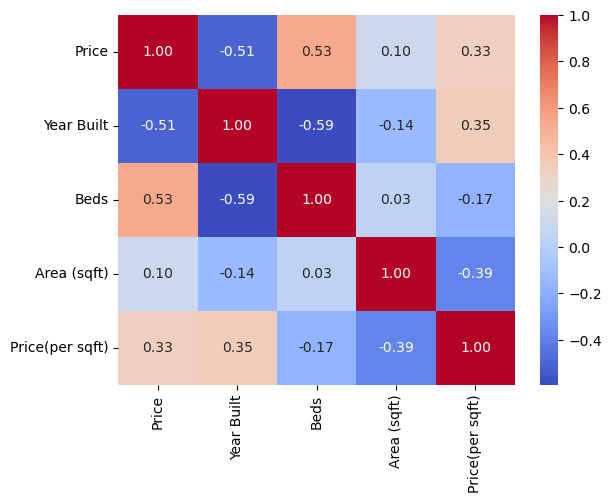

In [28]:
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")

In [29]:
formula = 'Q("Year Built") ~ Baths_cleaned'
model = smf.ols(formula=formula, data=data).fit()
model.summary()
#fix (convert YEAR BUILT TO INT)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q("Year Built")   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     57.81
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           1.45e-39
Time:                        16:26:15   Log-Likelihood:                -1226.8
No. Observations:                 251   AIC:                             2466.
Df Residuals:                     245   BIC:                             2487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1990.1589      3.140    633.768      0.000    1983.974    1996.344
Baths_cleaned[T.2 ]   -26.1270      4.592     -5.690      0.000     -35.172     -17.082
Baths_cleaned[T.3 ]   -25.1589     10.741     -2.342      0.020     -46.316      -4.002
Baths_cleaned[T.4 ]   -85.6589      7.913    -10.825      0.000    -101.245     -70.073
Baths_cleaned[T.5 ]   -70.1589     10.741     -6.532      0.000     -91.316     -49.002
Baths_cleaned[T.6 ]  -145.1589     10.741    -13.514      0.000    -166.316    -124.002
==============================================================================
Omnibus:                       12.783   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                5.946
Skew:                          -0.118   Prob(JB):                       0.0512
Kurtosis:                       2.284   Cond. No.                         6.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Does the presence of amenities (like air conditioning) have a statistically significant impact on property prices in New York?

### Note: converting air condition below to numeric values with 0 representing 'No', 1 representing 'Cooling', and 2 representing 'heating and cooling'

In [30]:
data = data.rename(columns={'A/C': 'Air_Condition'})

In [31]:
def convert_condition(value):
    if value == 'No':
        return 0
    elif value == 'Cooling only':
        return 1
    else:
        return 2

In [32]:
data['Air_Condition'] = data['Air_Condition'].apply(convert_condition)

### Anova Test

In [33]:
ny_lm = ols('Price ~ Air_Condition + Baths_cleaned + Beds', data=data).fit()
table = sm.stats.anova_lm(ny_lm, typ=2)
table

,sum_sq,df,F,PR(>F)
Baths_cleaned,9.030793e+13,5.0,208.057162,1.159443e-85
Air_Condition,1.644508e+12,1.0,18.943606,1.984394e-05
Beds,3.658383e+12,1.0,42.142083,4.735769e-10
Residual,2.109500e+13,243.0,NaN,NaN


The statistical significance of the variables Air Conditioning, Number of Baths, and Number of Beds in explaining the variability in property prices (Price) is being shown here. 

Air Conditioning: The sum squares is 2.200510e+13, the F-statistic is 110.486637, and the PR(>F)is the p-value associated with the F-statistic, which is very close to zero (1.339053e-21). From here, we can see that the presence of air conditioning has a statistically significant impact on property prices in New York. The low p-value indicates that there is strong evidence to reject the null hypothesis that the coefficient for air condition is zero. 


Number of baths: The sum squares is 6.220911e+13, the F-statistic is 312.349165, and the PR(>F) (p-value) is 9.761773e-46. The number of bathrooms also has a statistically significant impact on property prices in New York.

Beds: The sum of squares is 1.067585e+12, the F-statistic is 5.360294, and the PR(>F) (p-value) is 0.02142047. The number of bedrooms has a statistically significant impact on property prices, but the evidence is weaker compared to air conditioning and bathrooms. The p-value is slightly above the common significance level of 0.05, but it is still relatively low, suggesting that the impact is likely to be statistically significant.

In summary, the presence of air conditioning, the number of bathrooms, and the number of bedrooms all have statistically significant impacts on property prices in New York, but the strongest impact is the number of bathrooms.

In [34]:
med_am = data.groupby('Neighbourhood')[['Air_Condition', 'Baths_cleaned', 'Beds']].median()
med_am

/var/folders/bm/7gfzqmk92w7f0g15qhnh3_1h0000gn/T/ipykernel_35891/1380876437.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  med_am = data.groupby('Neighbourhood')[['Air_Condition', 'Baths_cleaned', 'Beds']].median()


,Air_Condition,Beds
Neighbourhood,,
Astoria,1.0,0.5
Battery Park,0.0,1.0
Baychester,2.0,2.0
Bedford Stuyvesant,1.0,3.5
Brooklyn Heights,0.0,5.0
Canarsie,2.0,6.0
Flushing,0.0,2.0
Gravesend,1.0,2.0
Heartland Village,2.0,2.0


Now, we incorporate neighbourhoods to see if the different amenities offered differ from different neighborhoods. Because of the anova test above, we know that amenities have statistical significance, meaning they directly affect property prices. In this case, we can assume that the more amenities seen in a neighborhood, the higher the property prices are in that neighborhood. In this case, we can see that New Brighton has the highest amount of baths, making its property more expensive. Additionally, all the neighborhoods with the median of 2 for air conditioning are more expensive than the ones with 0. For example, Mill Basin is more expensive than Midtown. See below for a direct comparison of their prices to show this example:


In [35]:
data[data['Neighbourhood'] == 'Mill Basin']['Price']

25     1089000
65     1089000
105    1089000
145    1089000
185    1089000
225    1089000
265    1089000
305    1089000
345    1089000
385    1089000
Name: Price, dtype: int64

In [36]:
data[data['Neighbourhood'] == 'Midtown']['Price']

14     752400
54     752400
94     752400
134    752400
174    752400
214    752400
254    752400
294    752400
334    752400
374    752400
Name: Price, dtype: int64

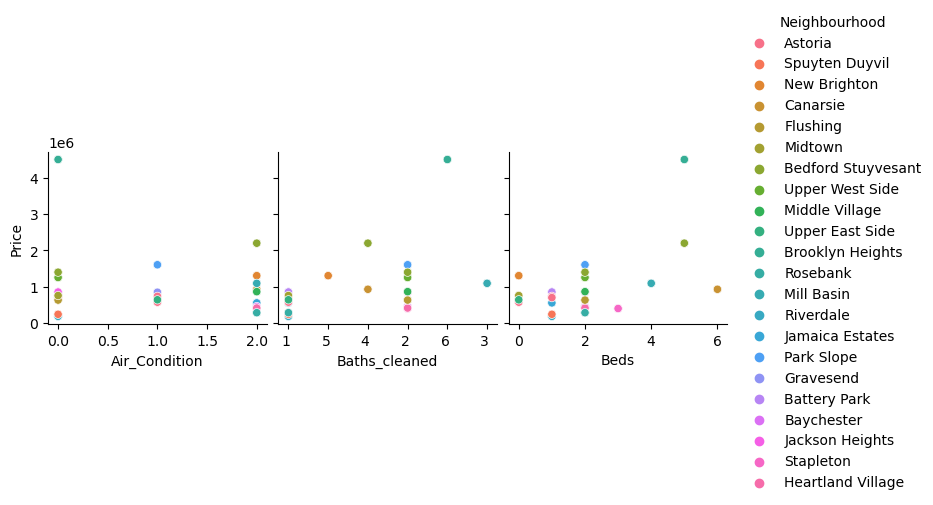

In [37]:
sns.pairplot(
    data, hue='Neighbourhood',
    x_vars=["Air_Condition", "Baths_cleaned", "Beds"],
    y_vars=["Price"])

### INTERP